## Learning the dynamical network of a spiral dynamical simulation with a single attractor

#### Import libraries

In [1]:
%load_ext nb_black

import scdiffeq as sdq

odeint, torch, np, pd, plt, nn, a, os, time, optim, sp, PCA, v = sdq.ut.devlibs()

<IPython.core.display.Javascript object>

#### Spiral dynamic system with a single attractor: 

$$\textbf{F(x)}=\begin{equation}
\left\{ 
  \begin{aligned}
    \frac{dx}{dt} = \textbf{F}_{1}(x, y) = -x + y^{2}\\
    \frac{dy}{dt} = \textbf{F}_{2}(x, y) = -y - xy\\
  \end{aligned}
  \right.
\end{equation}$$

#### Instantiate the `GenericSimulator` class and perform the simulation.

Simulator initiated. Importing preloaded state functions.

Initial conditions sampling function: numpy.random.normal


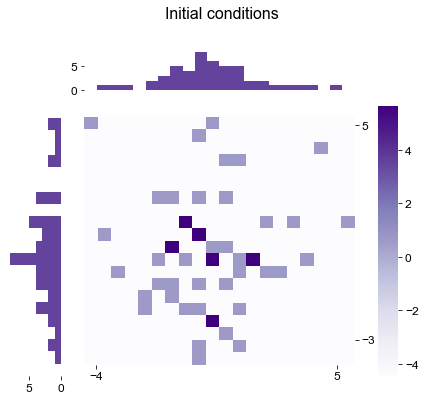


Simulating 50 trajectories from parabola_2d over 20 time points in each trajectory...

 AnnData object with n_obs × n_vars = 1000 × 2
    obs: 'time', 'trajectory'


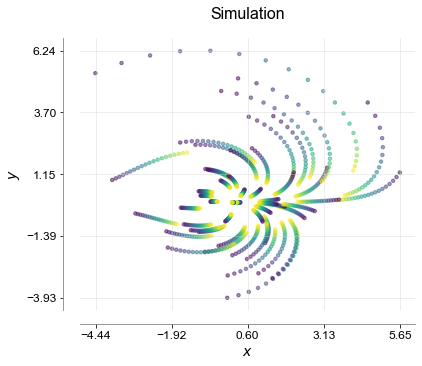

<IPython.core.display.Javascript object>

In [2]:
Simulation = sdq.data.GenericSimulator()
Simulation.set_initial_conditions_sampling_distribution("normal")
Simulation.get_initial_conditions(
    loc=0, scale=2, size=[50, 2], plot=True
)  # i.e., normal(loc=0.0, scale=1.0, size=None)
Simulation.create_time_vector(time_span=0.5, n_samples=20)
Simulation.simulate_ODE("parabola_2d")

In [3]:
DiffEq = sdq.tl.scDiffEq(n_layers=5)

Neural_ODE(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=50, bias=True)
    (af_0): Tanh()
    (1): Linear(in_features=50, out_features=50, bias=True)
    (af_1): Tanh()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (af_2): Tanh()
    (3): Linear(in_features=50, out_features=50, bias=True)
    (af_3): Tanh()
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)


<IPython.core.display.Javascript object>

#### Run preflight

This is an necessary step after instantiating the differential equation to be learned and before training that network / DiffEq. In this step, supporting classes for storing information related to training are created. Additionally, the data is split into test, train, and validation subsets and checked for any data leaking.

In [4]:
DiffEq.preflight(Simulation.adata)

adata.X is already of dtype: numpy.ndarray

Checking for overlap between test, train, and validation subsets...

Checking between...

	 train validation
	 train test
	 validation train
	 validation test
	 test train
	 test validation


<IPython.core.display.Javascript object>

#### Plot the predictions of the naive network

Typically, one shouldn't expose a network or themselves to the test data prior to formal training and evaluation, however this is just for illustrative purposes to show that the network has now idea how to solve the initial value provlem or forward integrate properly, given time. 

MSELoss: 1.2955


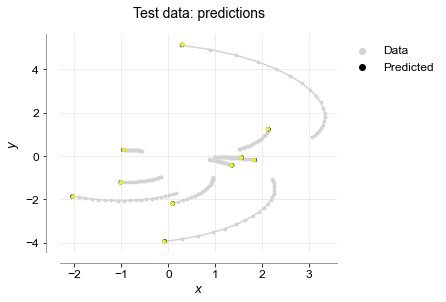

<IPython.core.display.Javascript object>

In [5]:
DiffEq.evaluate()

Training progress:   0%|          | 0/500 [00:00<?, ?it/s]

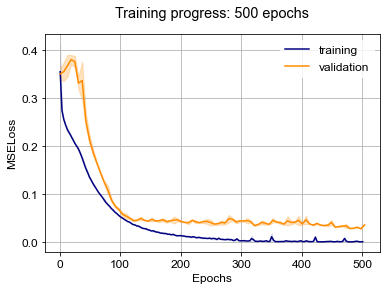

<IPython.core.display.Javascript object>

In [6]:
DiffEq.learn(n_epochs=500)

#### Evaluation of trained DiffEq

MSELoss: 0.0261


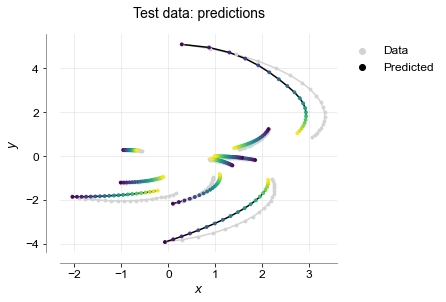

<IPython.core.display.Javascript object>

In [7]:
DiffEq.evaluate()